In [3]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('housing.csv')

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# drop NA's
df.dropna(inplace=True)
# create dummies for categorical variable
dummies = pd.get_dummies(df['ocean_proximity'])
# concatenate dummies to df
df = pd.concat([df, dummies], axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [7]:
# drop original
df.drop(['ocean_proximity'], axis=1, inplace=True)
df.to_csv('cleaned_CA_housing.csv', index=True)

Text(0.5, 1.0, 'Heatmap of CA Housing Variables')

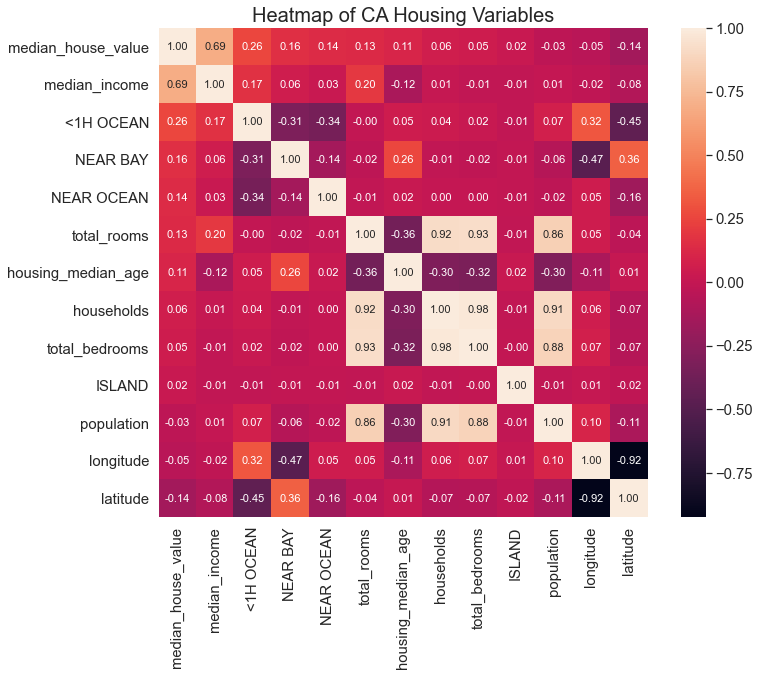

In [8]:
# set heatmap size
plt.figure(figsize=(12, 9))
# correlation matrix
corrmat = df.corr()
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'median_house_value')['median_house_value'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 11}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Heatmap of CA Housing Variables', fontsize =20)



Text(0.5, 1.0, 'Contour Plot of California Home Density')

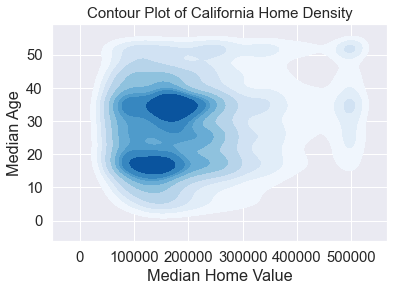

In [9]:
# contour plot 
ax=sns.kdeplot(x=df.median_house_value, y=df.housing_median_age, cmap='Blues', shade=True)
ax.set(xlabel='Median Home Value', ylabel='Median Age')
plt.title('Contour Plot of California Home Density', fontsize =15)

In [10]:
# calculate BBox to get map image of CA
BBox =((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))

In [11]:
BBox

(-124.35, -114.31, 32.54, 41.95)

In [12]:
# import map image
mymap = plt.imread('CA_map.png')

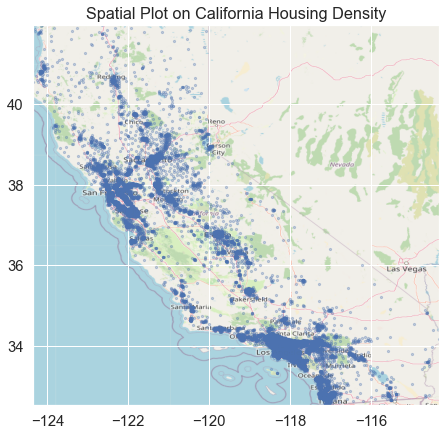

In [13]:
# create spatial plot
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.longitude, df.latitude, zorder=1, alpha=0.3, c='b', s=5)
ax.set_title('Spatial Plot on California Housing Density')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal')

In [14]:
from joypy import joyplot

<Figure size 432x288 with 0 Axes>

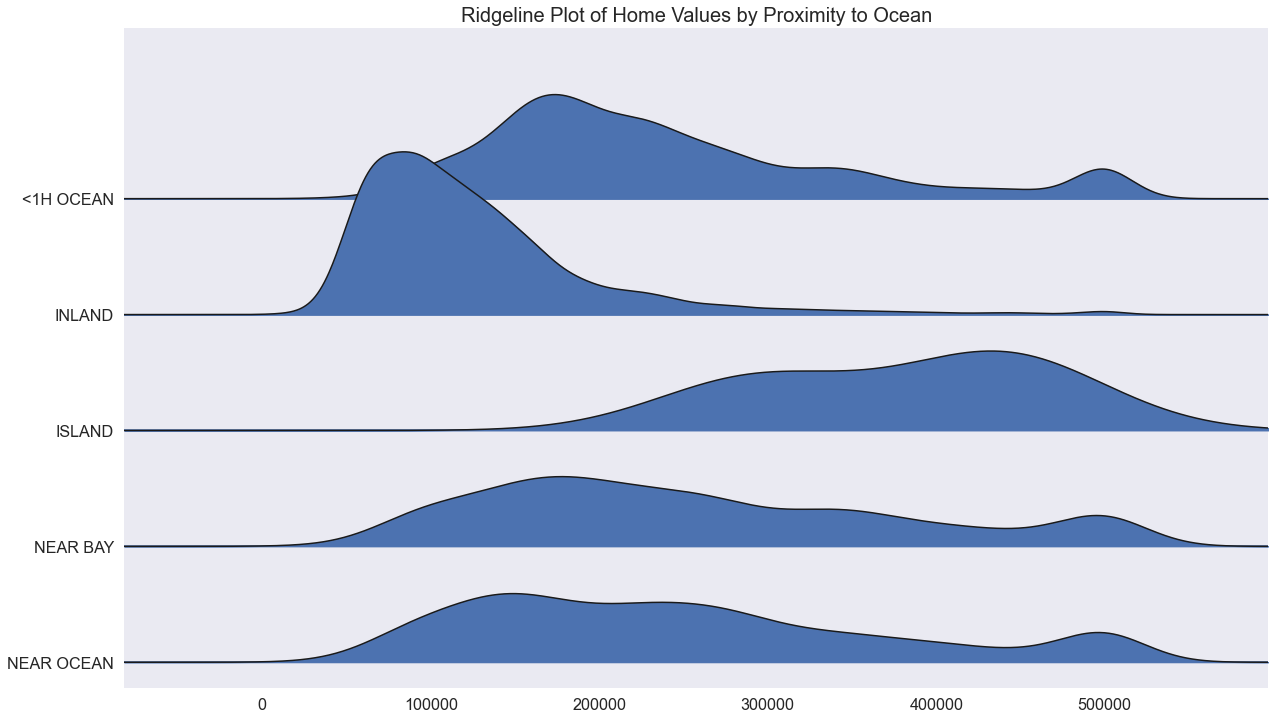

In [27]:
plt.figure()

joyplot(
    data=df[['median_house_value', 'ocean_proximity']], 
    by='ocean_proximity',
    figsize=(18, 10)
)
plt.title('Ridgeline Plot of Home Values by Proximity to Ocean', fontsize=20)
plt.show()